# Carbonate system solved from scratch 
The following code will calculate the pH of a solution in an open carbonate system. The alkalinity of the solution is purely described by $H^+$, $OH^-$, $HCO_3^-$, and $CO_3^{-2}$. There are no other acid-base systems added in the example , like present in very organic rich soil water or in the seawater. This is a simplification made to show the concept behind it and avoid making the calculations too long and too complicated. However including further variables just can be done easily by adding the acid constants and append the conjugate base to the total alkalinity expression.

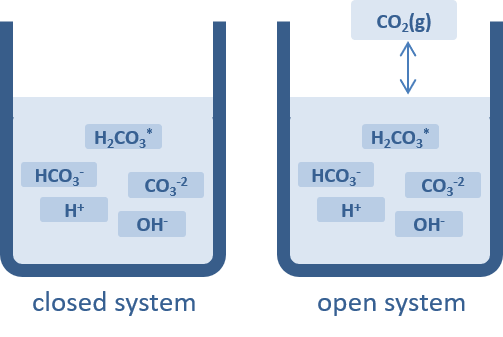

source: https://www.aqion.de/site/161

Henry's law: at a constant temperature, the amount of dissolved gas in a liquid is proportional to its partial pressure above the liquid.

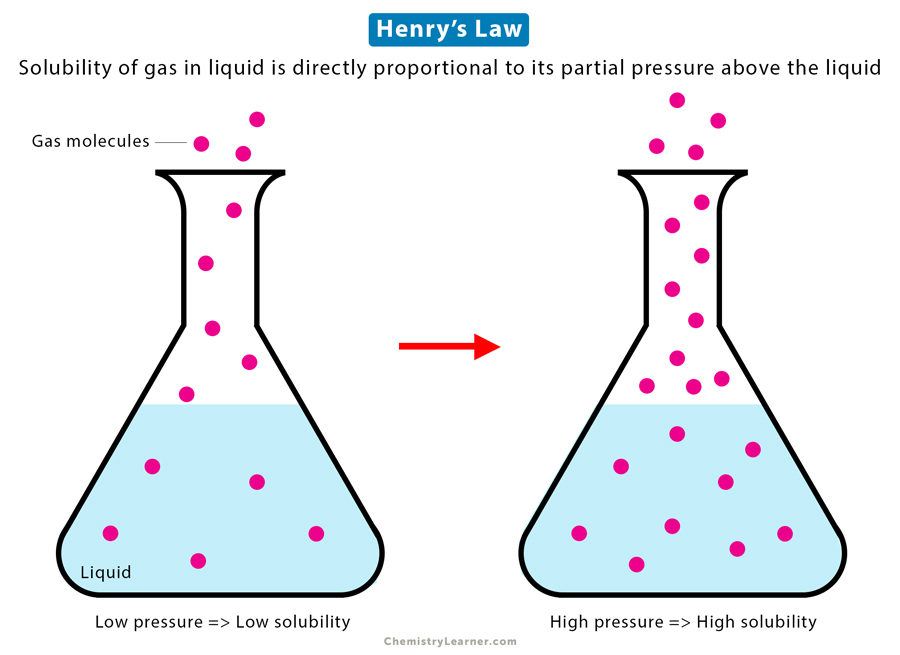

source:  https://www.chemistrylearner.com/henrys-law.html

# Henry's law 
In physical chemistry, Henry's law states that the amount of dissolved gas in a liquid is directly proportional to its partial pressure above the liquid.


For the constants and temperature dependece there is a beautiful webiste reporting how the constants evolved over time 
http://www.henrys-law.org/henry/

For the CO2 constants see https://henrys-law.org/henry/casrn/124-38-9

$H^{cp}$ = Henry solubility (defined as c/p) [mol m$_{aq}^{−3}$ Pa$^{−1}$]

$${\displaystyle H_{\rm {s}}^{cp}={\frac {c_{\text{a}}}{p}}}$$


## Temperature dependence of Henry’s law constants

The temperature dependence of equilibrium constants can generally be described with the van ’t Hoff equation (e.g., Atkins, 1986). It also applies to Henry’s law constants:


$${\displaystyle {\frac {\mathrm {d} \ln H}{\mathrm {d} (1/T)}}={\frac {-\Delta _{\text{sol}}H}{R}}}$$

where ${-\Delta _{\text{sol}}H} $ = enthalpy of dissolution. Note that the letter $H$ in the symbol ${-\Delta _{\text{sol}}H} $ refers to enthalpy and is not related to the $H$ of Henry’s law constants. Integrating the above equation leads to

Integrating the above equation leads to:

$H(T)= A \cdot exp(\frac{B}{T})$

Alternatively, one can create an expression based on H 	 at the reference temperature T 	 = 298.15 K:

$${\displaystyle H(T)=H^{\circ }\exp \left[{\frac {-\Delta _{\text{sol}}H}{R}}\left({\frac {1}{T}}-{\frac {1}{T^{\circ }}}\right)\right]}$$


$${\displaystyle \frac {-\Delta _{\text{sol}}H}{R} = 2400 K}$$

The $H^{cp}$ at reference temperature T= 298.15 K:

${\displaystyle H^{\circ}=3.3  \cdot 10^{-4}}$  mol m$_{aq}^{−3}$ Pa$^{−1}$ 

The conversion to  are calculated at a temperature of T = 298.15 K and a solution density of ϱ = 997 kg/m3.
Conversion to mol kg$^{-1}$ Pa$^{−1}$:


$conv=1.00301 \cdot 10^{-3}$


${\displaystyle H^{\circ}=3.3  \cdot 10^{-4}} \cdot 1.00301 \cdot 10^{-3} = 3.309933 \cdot 10^{-7}$  mol kg$^{-1}$ Pa$^{−1}$ 







# Dalton's law of partial pressures

https://en.wikipedia.org/wiki/Partial_pressure

Dalton's law expresses the fact that the total pressure of a mixture of ideal gases is equal to the sum of the partial pressures of the individual gases in the mixture. This equality arises from the fact that in an ideal gas, the molecules are so far apart that they do not interact with each other. Most actual real-world gases come very close to this ideal.

$${\displaystyle p=p_{{{A}}}+p_{{{B}}}+p_{{{C}}}}$$

- $p=$  total pressure of the gas mixture
 
- $A, B, C$=different gases
 
# Partial Pressure of CO2

The Carbon Dioxide Concentration in the atmsophere.
https://gml.noaa.gov/ccgg/trends/

$c(CO2)=418 ppm = 418 \cdot 10^{-6} $


The standard pressure of the atmosphere.
https://en.wikipedia.org/wiki/Standard_atmosphere_(unit)
https://en.wikipedia.org/wiki/Atmospheric_pressure

$p_{atm}= 101325 Pa $

Taking the total pressure $p_{atm}$ and the concentration $c(CO_2)$ we can get the atmospheric partial pressure of CO2


$pCO2= 101325 \cdot 418 \cdot 10^{-6}= 42.35385 Pa$



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [6]:

p_atm=101325 #Pa

c_CO2=418e-6 # 1

pCO2_atm=p_atm*c_CO2 # Pa

#henrys law constant at reference T 
H_ref=3.3e-4

conv=1.00301e-3

H_ref=H_ref*conv

In [7]:
#temperature dependece factor for CO2
f_CO2=2400 

T_ref=298.15

H_ref=3.31*1e-7

# Henry's law temperature dependence
# T in celsius

def Henry(T):
    
    #convert to Kelvin
    T_K=273.15+T
    
    res=H_ref*np.exp(f_CO2*((1/T_K)-(1/T_ref)))
    
    
    return res


test=Henry(25)

In [8]:

#concentration of CO2aq in the water 
c_CO2_aq=pCO2_atm*Henry(25)  # mol/kg
print('CO2_aq-concentration [mol/kg]=',c_CO2_aq)

CO2_aq-concentration [mol/kg]= 1.401912435e-05


# Dissociation constants
Those dissociation constants are dependent on Ionic strength (all dissolved ions charge summed up) of the solution. This dependence will be neglected here. It will make the calculation much more complicated.

$${\displaystyle I={\begin{matrix}{\frac {1}{2}}\end{matrix}}\sum _{i=1}^{n}c_{i}z_{i}^{2}} $$

both cations and anions, $c_{i}$ is the molar concentration of ion i (M, mol/L), $z_{i}$ is the charge number of that ion

https://en.wikipedia.org/wiki/Carbonic_acid


The squared brackets imply the concentration is meant:

$$ c( CO_3^{-2} ) = [ CO_3^{-2} ]. $$

Because the $CO_2(aq)$ reacts fdast to $H_2 CO_3$
$$ [CO_2 ] = [CO_2(aq) ]+ [H_2 CO_3 ].$$

## 1. dissociation constant carbonic acid

$$ CO_2 + H_2O ->H^{+} + HCO_3^{-}$$

$$ K_1^{'} = \frac{ [HCO_3^{-} ] \cdot [H^{+}] }{ [CO_2 ] } $$

## 2. dissociation constant carbonic acid

$$ HCO_3^{-} -> H^{+} + CO_3^{-2} $$

$$ K_2^{'}=\frac{ [CO_3^{-2} ] \cdot [H^{+} ] }{ [ HCO_3^{-} ] } $$

## disscociation constant of water

$$ H_2O -> H^{+} + OH^{-} $$

$$ K_w = [H^{+} ] [OH^{-} ] $$


## Variation of the dissociation constants 
The dissociation constants vary with Salinity (the Ionic strenght of the solution), pressure of the system and temperature

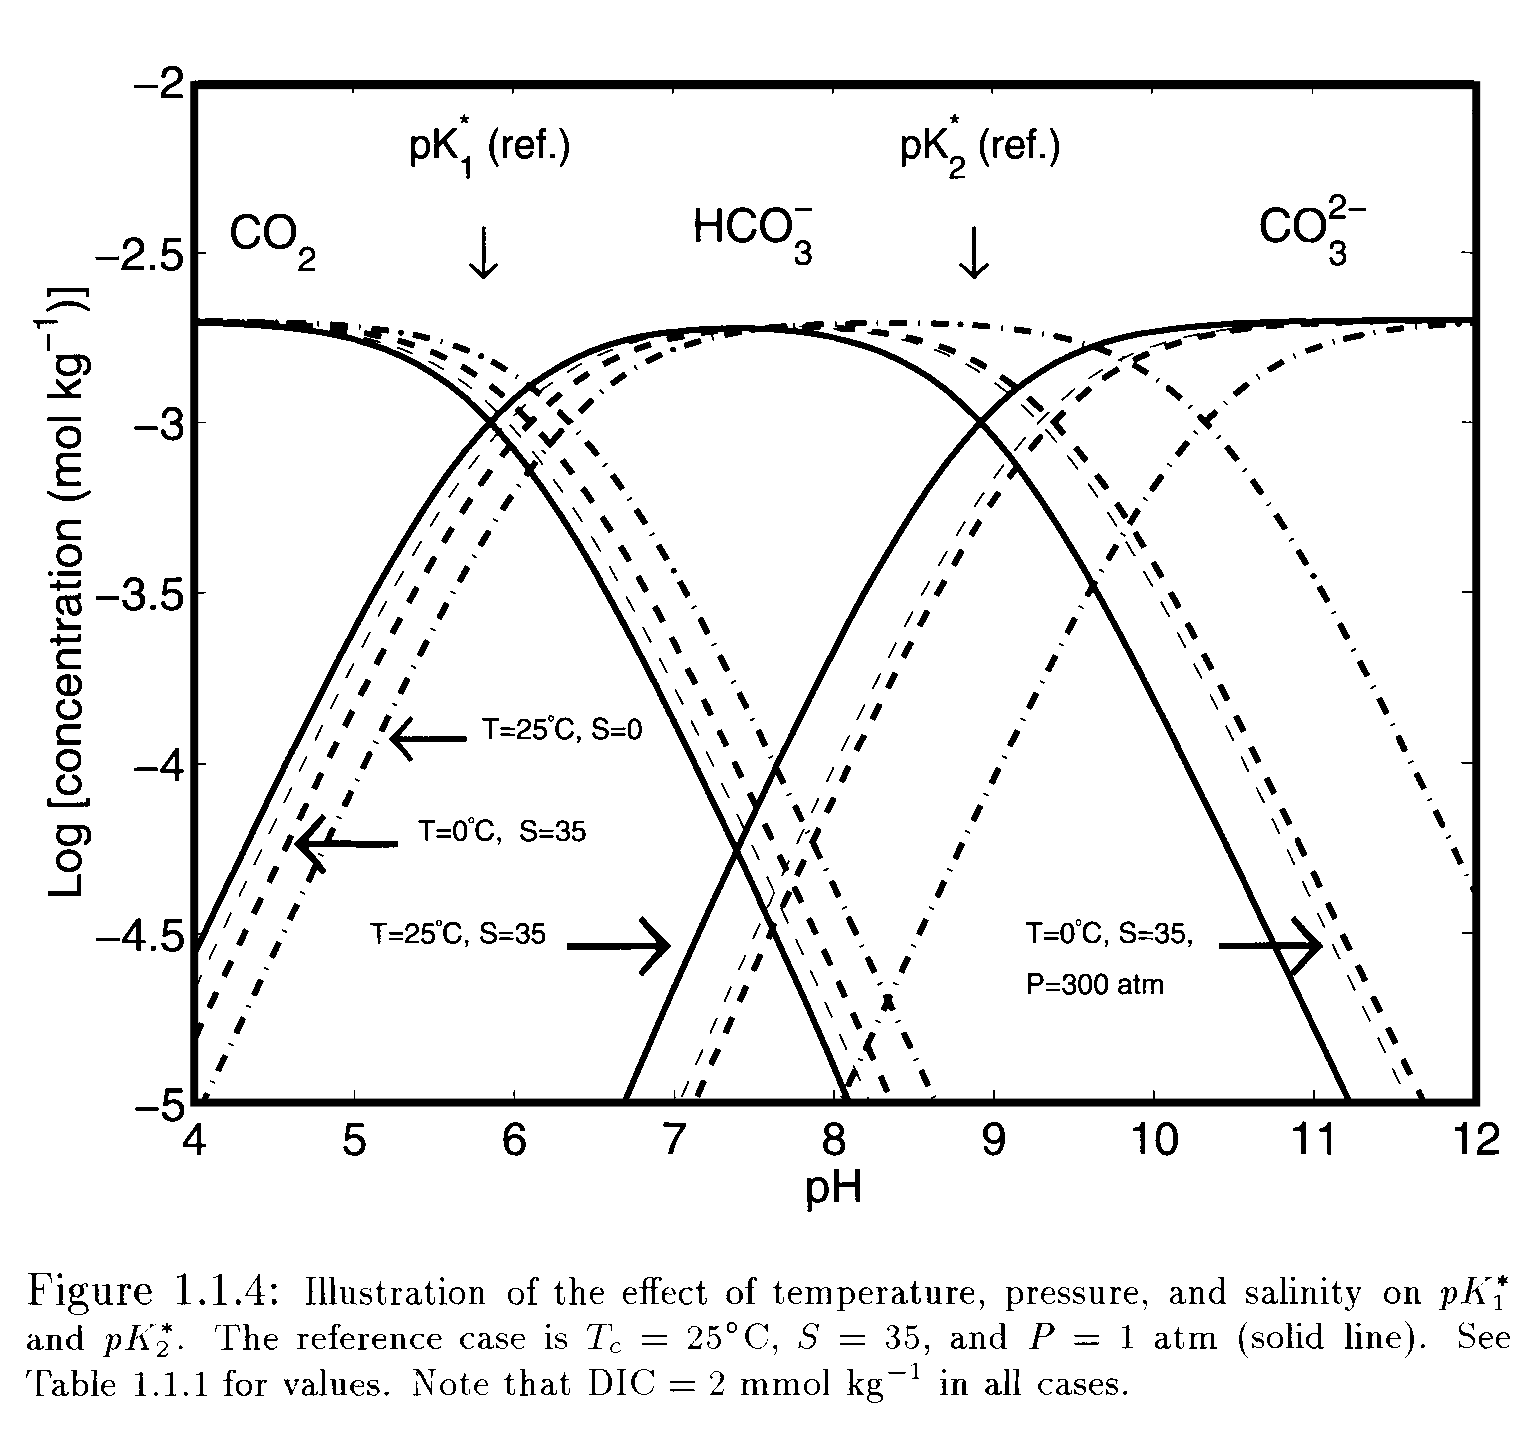

source: (Zeebe and Wolf-Gladrow, 2001)

# Simple Alkalinity (TA) expression
Acid buffering capaity of a carbonate solution.

Carbonate alkalinity

The alkalinity can be introduced  by any alkaline substance added to the solution for example:

Some Hydroxides (strong quick reacting base):
- NaOH, Ca(OH)2), Mg(OH)2...

some Carbonates:
- NaHCO3, Na2CO3, CaCO3, MgCO3 ...

The hydroxides will react with the CO2 the Carbonic acid from the atmosphere to from an new equilibrium state.

$$OH^{-} + CO_2 -> HCO_3^- $$


Alkalinity expression for a pure carbonate and hydroxide acid-base system. There are no other acid-base pairs involved like other inorganic bases or organic acids

$$ TA = [HCO_3^-]+2 \cdot [CO_3^{-2}]+[OH^-]-[H^+]$$



set in everything:


$$ TA=   \frac{  [CO_2] \cdot K_1^{'} }{ [H^{+}]  } +2 \cdot \frac{ [HCO_3^-] \cdot  K_2^{'}}{ [H^{+}] } + \frac{K_w}{[H^{+} ]} -[H^+] $$

set in $[HCO_3^-]$ again:

$$ TA=   \frac{  [CO_2] \cdot K_1^{'} }{ [H^{+}]  } +2 \cdot \frac{  [CO_2] \cdot K_1^{'} }{ [H^{+}]  } \cdot \frac{ K_2^{'}}{ [H^{+}] } + \frac{K_w}{[H^{+} ]} -[H^+] $$

simplfy it:

$$  TA=   \frac{  [CO_2] \cdot K_1^{'} }{ [H^{+}]  } + 2 \cdot \frac{  [CO_2] \cdot K_1^{'} \cdot K_2^{'} }{ [H^{+}]^2 } + \frac{K_w}{[H^{+} ]} -[H^+]    $$


solve it (find the correct $[H^+]$: 

$$  0= TA- \frac{  [CO_2] \cdot K_1^{'} }{ [H^{+}]  } + 2 \cdot \frac{  [CO_2] \cdot K_1^{'} \cdot K_2^{'} }{ [H^{+}]^2 } + \frac{K_w}{[H^{+} ]} -[H^+]    $$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# I am using the constants from phreeqc.dat  database avaiable at:
# https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final-90.html

#(Parkhurst and Appelo, 2013)



#first dissociation constant of carbonic acid
pK1=6.352

K1=10**-pK1

#second dissociation constant of carbonic acid
pK2=10.329

K2=10**-pK2


# dissociation of water 

pKw=14

Kw=10**-pKw




In [16]:
#alkalinity of the solution 
# 10 mmol/kg
TA=10*1e-3  # mol/kg  

TA=5*1e-3  # mol/kg 


#define the  alklainity function

# the variable is teh H+ concentration which is directly linked to the pH
func = lambda H_ : TA - (  (K1*c_CO2_aq/H_) +2*(K1*K2*c_CO2_aq/H_**2)  + (Kw/H_) - H_)


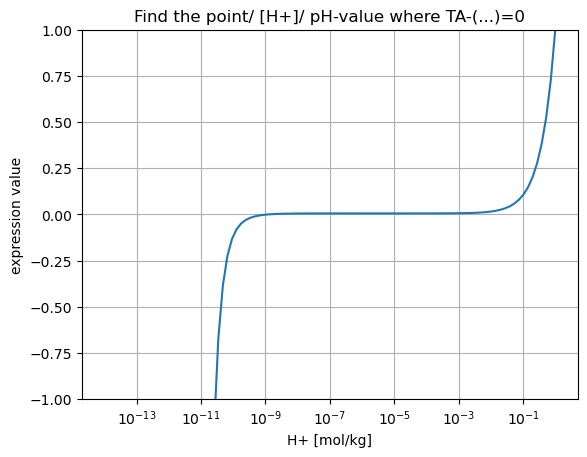

In [17]:
H = np.logspace(-14,0, 100)

plt.plot(H, func(H))
plt.xlabel("H+ [mol/kg]")
plt.ylabel("expression value")
plt.xscale('log')
plt.ylim([-1,1])
plt.grid()
plt.title('Find the point/ [H+]/ pH-value where TA-(...)=0')
plt.show()


# Find the pH at equilibrium of the solution 

In [18]:

# Use the numerical solver to find the roots

H_initial_guess = 1e-8
H_solution = fsolve(func, H_initial_guess)

print("The solution H+ concentration is   c(H+) = %e mol/kg " % H_solution)
print("at which the value of the expression is %e" % func(H_solution))


print("The pH of the solution at equilibrium with the atmosphere: pH= %f" % -np.log10(H_solution))


The solution H+ concentration is   c(H+) = 1.336151e-09 mol/kg 
at which the value of the expression is -2.602085e-18
The pH of the solution at equilibrium with the atmosphere: pH= 8.874144


# References:

Zeebe, R.E. and Wolf-Gladrow, D. (2001) CO2 in seawater: equilibrium, kinetics, isotopes. Gulf Professional Publishing (65).

Parkhurst, D., Appelo, C., 2013. PHREEQC (Version 3)—A computer program for speciation, batch-reaction, one-dimensional transport, and inverse geochemical calculations. Model Tech B 6, 497.


